# Implementing a Neural Network from Scratch
这个笔记用来实现一个基本的NN结构，只用numpy。

主要是好好看一下反向传播的推导过程，怎么把公式变成代码。参考的文件在这里： https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generating a dataset

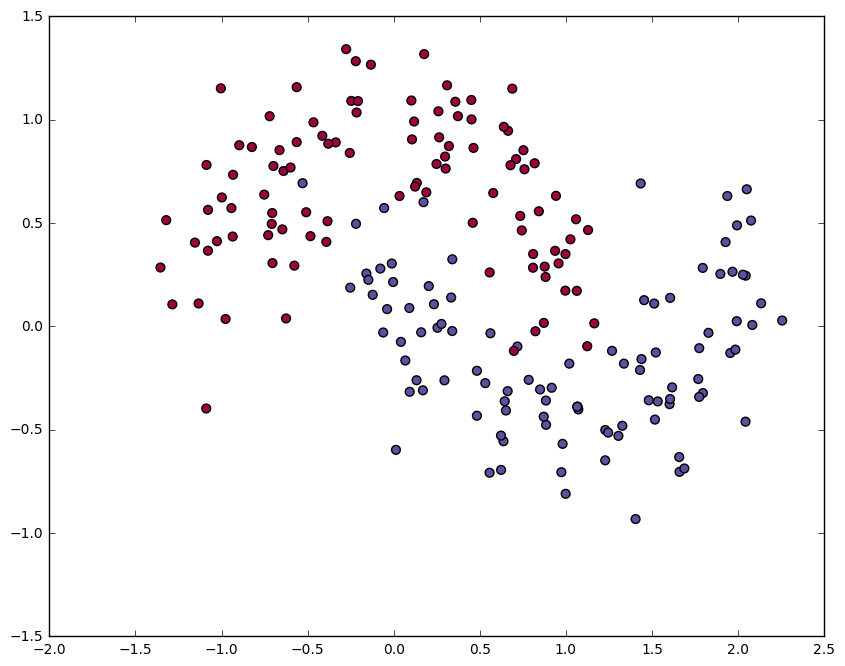

In [3]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
# 200: 200个samples
# noise：Standard deviation of Gaussian noise added to the data.
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
# X[:, 0]: x
# X[:, 1]: y
# s=40: size in points
# c=y: color
# cmap: A Colormap instance or registered name. cmap is only used if c is an array of floats. 
#       If None, defaults to rc image.cmap.

In [5]:
X.shape

(200, 2)

In [25]:
y.shape

(200,)

# Logistic Regression


In [7]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [8]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

关于np.meshgrid的解释可以看这里：
https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python

In [18]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01

In [15]:
print(x_min, x_max)

-1.85462041177 2.75536302013


In [17]:
np.arange(x_min, x_max, h).shape

(461,)

In [19]:
np.arange(y_min, y_max, h).shape

(328,)

In [20]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [22]:
print(xx.shape, yy.shape)

(328, 461) (328, 461)


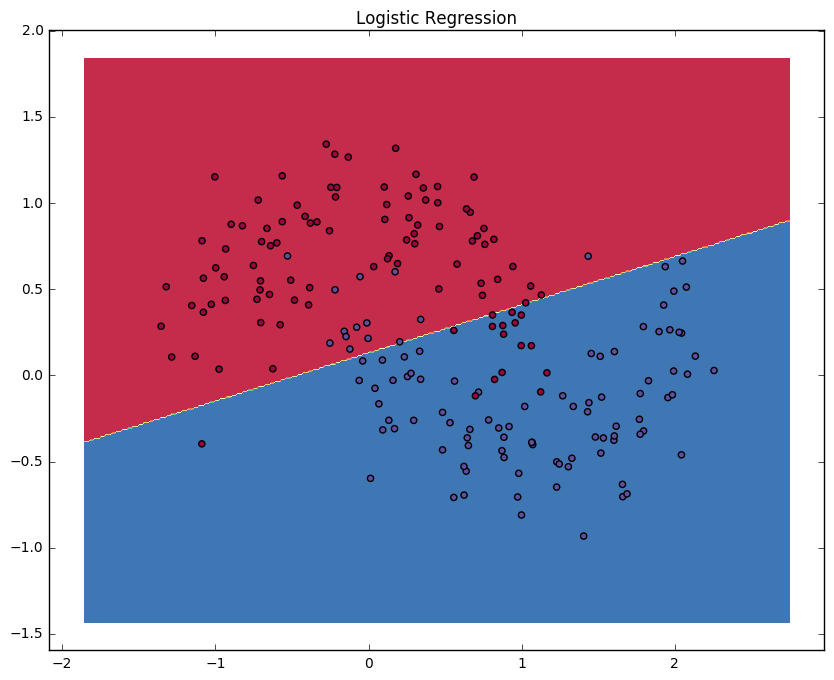

In [23]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

# Training a Neural Network

这次的网络结构是input layer neuron = 2, hidden layer neuron = 5, output layer neuron = 2(0和1两个class，而且容易扩展成多标签）

- activation function用tanh
- 输出层用softmax
- 因为用了softamx，loss function 就用cross-entropy loss了
- 优化器：batch gradient descent with a fixed learning rate

## How our network makes predictions
## Learning the Parameters
上面两节设计了公式，具体还是直接看原文好了

## Implementation
下面实现这个2：3：2的网络

In [27]:
num_examples = len(X) # 200
nn_input_dim = 2
nn_output_dim = 2

# Gradient descent parameters
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values.
    # We need to learn these
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)

In [92]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss---没看懂下面的公式
    print(probs[:5])
    corect_logprobs = -np.log(probs[range(num_examples), y])
    print(corect_logprobs[:5])
    data_loss = np.sum(corect_logprobs)
    print(data_loss)
    
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / num_examples * data_loss

In [95]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

写了一半感觉没必要，如果就像上面的写成函数的话，里面的一些东西我还是没有懂，下面我直接不套在函数里了，全都写在外面。

In [96]:
# ================build_model==================
nn_hdim = 3
num_passes = 20 # epoch
print_loss=True

# Initialize the parameters to random values.
# We need to learn these
np.random.seed(0)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) # 2*3
b1 = np.zeros((1, nn_hdim)) # 1*3
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3*2
b2 = np.zeros((1, nn_output_dim)) # 1*2

for i in range(0, num_passes): 
    
    # Forward propagation
    z1 = X.dot(W1) + b1 # 200*3
    a1 = np.tanh(z1) # 200*3
    z2 = a1.dot(W2) + b2 # 200*2
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # softmax function
    
    # Backpropagation
    delta3 = probs
    delta3[range(num_examples), y] -= 1 # 把猜对的class对应的概率值减1，变为负数？
    dW2 = (a1.T).dot(delta3) # (3*200) * (200*2)=3*2
    db2 = np.sum(delta3, axis=0, keepdims=True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)
    
    #Add regularization terms (b1 and b2 don't have regularization )
    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1
    
    # Gradient descent parameter update
    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2
    
    # Assign new parameters to the model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 5 == 0:
        print('Loss after iteration %i: %f' % (i, calculate_loss(model)))

[[ 0.51268982  0.48731018]
 [ 0.22130624  0.77869376]
 [ 0.60487665  0.39512335]
 [ 0.50851307  0.49148693]
 [ 0.25943547  0.74056453]]
[ 0.66808426  0.25013743  0.92855728  0.67626436  0.30034251]
86.4331332398
Loss after iteration 0: 0.432387
[[ 0.69225705  0.30774295]
 [ 0.04924155  0.95075845]
 [ 0.69010652  0.30989348]
 [ 0.28581926  0.71418074]
 [ 0.10686384  0.89313616]]
[ 0.36779794  0.05049525  1.17152667  1.25239563  0.11301624]
63.2449820217
Loss after iteration 5: 0.316529
[[ 0.70043673  0.29956327]
 [ 0.02499852  0.97500148]
 [ 0.66323578  0.33676422]
 [ 0.20467089  0.79532911]
 [ 0.06496078  0.93503922]]
[ 0.35605124  0.02531629  1.08837225  1.58635201  0.06716681]
60.9661147942
Loss after iteration 10: 0.305166
[[ 0.76496246  0.23503754]
 [ 0.02172262  0.97827738]
 [ 0.68429263  0.31570737]
 [ 0.19907788  0.80092212]
 [ 0.06243889  0.93756111]]
[ 0.26792851  0.02196202  1.15293954  1.61405917  0.06447334]
60.2676598403
Loss after iteration 15: 0.301689


In [87]:
np.sum(delta3[:5], axis=0, keepdims=True)

array([[ 0.55534788, -0.55534788]])

In [88]:
delta3[:5]

array([[-0.43870304,  0.43870304],
       [ 0.47742209, -0.47742209],
       [ 0.56380323, -0.56380323],
       [-0.51828078,  0.51828078],
       [ 0.47110639, -0.47110639]])

In [89]:
print(z1.shape)
print(a1.shape)
print(z2.shape)
print(probs.shape)
print(delta3.shape)
print(W2.shape)
print(dW2.shape)
print(db2.shape)
print(dW1.shape)
print(db1.shape)

(200, 3)
(200, 3)
(200, 2)
(200, 2)
(200, 2)
(3, 2)
(3, 2)
(1, 2)
(2, 3)
(3,)


In [72]:
delta3[:5]

array([[-0.43870304,  0.43870304],
       [ 0.47742209, -0.47742209],
       [ 0.56380323, -0.56380323],
       [-0.51828078,  0.51828078],
       [ 0.47110639, -0.47110639]])

In [61]:
range(num_examples)

[range(0, 200)]

In [68]:
y[:5]

array([0, 1, 1, 0, 1])

In [67]:
probs[:5]

array([[ 0.56129696,  0.43870304],
       [ 0.47742209,  0.52257791],
       [ 0.56380323,  0.43619677],
       [ 0.48171922,  0.51828078],
       [ 0.47110639,  0.52889361]])

In [66]:
probs[range(num_examples), y][:5]


array([ 0.56129696,  0.52257791,  0.43619677,  0.48171922,  0.52889361])

The array `probs[range(num_examples), y]` is a 1D array of just the probabilities assigned to the correct classes for each example. 

In [55]:
print(exp_scores.shape)
print(exp_scores[:5])
print()
print(np.sum(exp_scores).shape)
print(np.sum(exp_scores))
print()
print(np.sum(exp_scores, axis=1, keepdims=True).shape)
print(np.sum(exp_scores, axis=1, keepdims=True)[:5])
print()
print(np.sum(exp_scores, axis=1, keepdims=False).shape)
print(np.sum(exp_scores, axis=1, keepdims=False)[:5])
# 如果设为False的话，就无法计算了
print()
print(probs.shape)
print(probs[:5])
print(1.62588881/2.89666421, 1.2707754/2.89666421)
print(1.69816955/3.55695641,  1.85878686/3.55695641)

(200, 2)
[[ 1.62588881  1.2707754 ]
 [ 1.69816955  1.85878686]
 [ 1.07459266  0.83137845]
 [ 0.59171676  0.63662691]
 [ 1.79211976  2.01194617]]

()
522.917350585

(200, 1)
[[ 2.89666421]
 [ 3.55695641]
 [ 1.90597111]
 [ 1.22834366]
 [ 3.80406593]]

(200,)
[ 2.89666421  3.55695641  1.90597111  1.22834366  3.80406593]

(200, 2)
[[ 0.56129696  0.43870304]
 [ 0.47742209  0.52257791]
 [ 0.56380323  0.43619677]
 [ 0.48171922  0.51828078]
 [ 0.47110639  0.52889361]]
0.561296958200067 0.438703041799933
0.4774220862605398 0.5225779137394602


In [29]:
W1

array([[ 1.24737338,  0.28295388,  0.69207227],
       [ 1.58455078,  1.32056292, -0.69103982]])

In [30]:
b1

array([[ 0.,  0.,  0.]])

查看效果

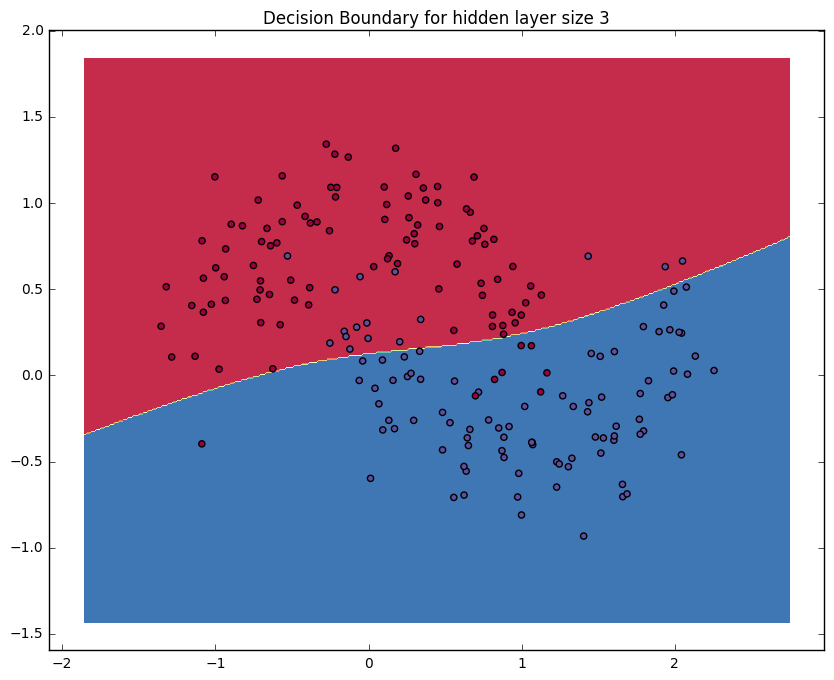

In [97]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")